<a href="https://colab.research.google.com/github/JarnovdKolk/Test/blob/main/Homework2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2, Parts A-B: Boosted Decision Tree

In this Jupyter notebook, we will train a boosted decision tree on the MiniBooNE dataset.

Use this notebook to write your code for problem 1 parts A-B by filling in the sections marked `# TODO` and running all cells.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
from xgboost import XGBClassifier

# ==============================================
# TODO: Implement the BDT model instance
# ==============================================
bdt = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric="logloss"
)
# ==============================================
# TODO: Fit the training data
# ==============================================
bdt.fit(X_train, y_train)

# retrieve predictions and take index [:, 1] corresponding to signal
preds_bdt = bdt.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:02:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


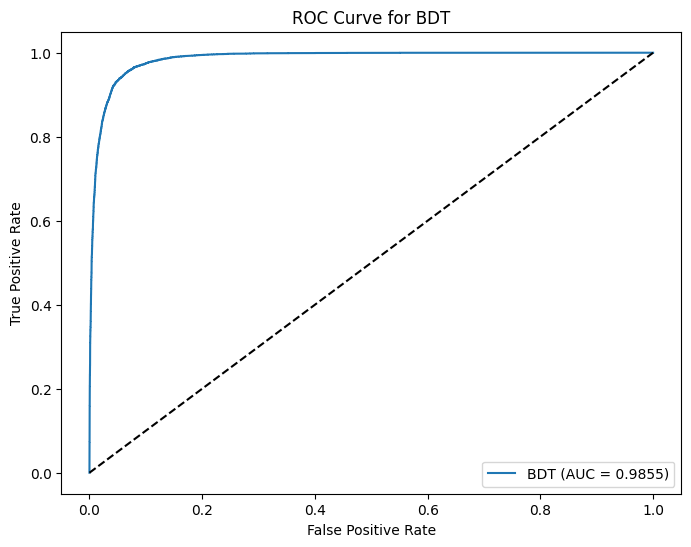

AUC: 0.9855
Accuracy: 0.9464


In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier, plot_importance

fpr, tpr, _ = roc_curve(y_test, preds_bdt)
roc_auc = auc(fpr, tpr)

# Compute accuracy
preds_bdt_class = (preds_bdt > 0.5).astype(int)
accuracy = accuracy_score(y_test, preds_bdt_class)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'BDT (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for BDT")
plt.legend()
plt.show()

print(f"AUC: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")

<Figure size 1000x600 with 0 Axes>

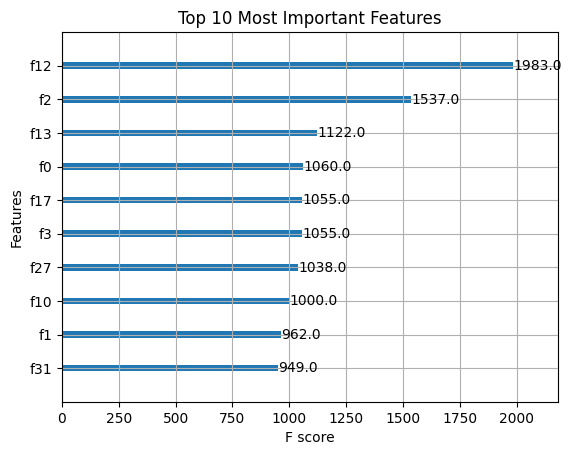

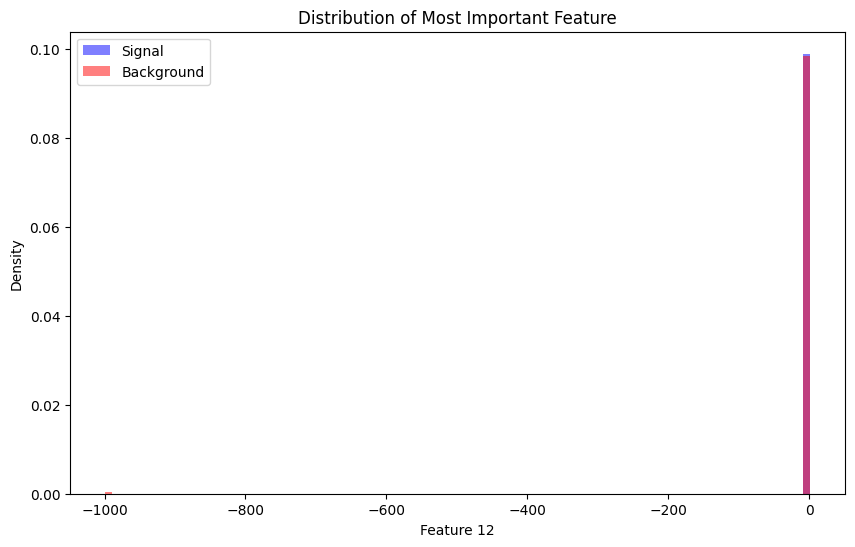

In [ ]:
# Problem B: Feature Importance Plot
plt.figure(figsize=(10, 6))
plot_importance(bdt, max_num_features=10)
plt.title("Top 10 Most Important Features")
plt.show()

top_feature_idx = 12

# Plot histogram of most important feature for signal and background
feature_values_signal = X_test[y_test == 1, top_feature_idx]
feature_values_background = X_test[y_test == 0, top_feature_idx]

# Determine binning
min_val, max_val = X_test[:, top_feature_idx].min(), X_test[:, top_feature_idx].max()
bins = np.linspace(min_val, max_val, 100)

plt.figure(figsize=(10, 6))
plt.hist(feature_values_signal, bins=bins, alpha=0.5, label="Signal", color="blue", density=True)
plt.hist(feature_values_background, bins=bins, alpha=0.5, label="Background", color="red", density=True)
plt.xlabel(f"Feature {top_feature_idx}")
plt.ylabel("Density")
plt.title("Distribution of Most Important Feature")
plt.legend()
plt.show()


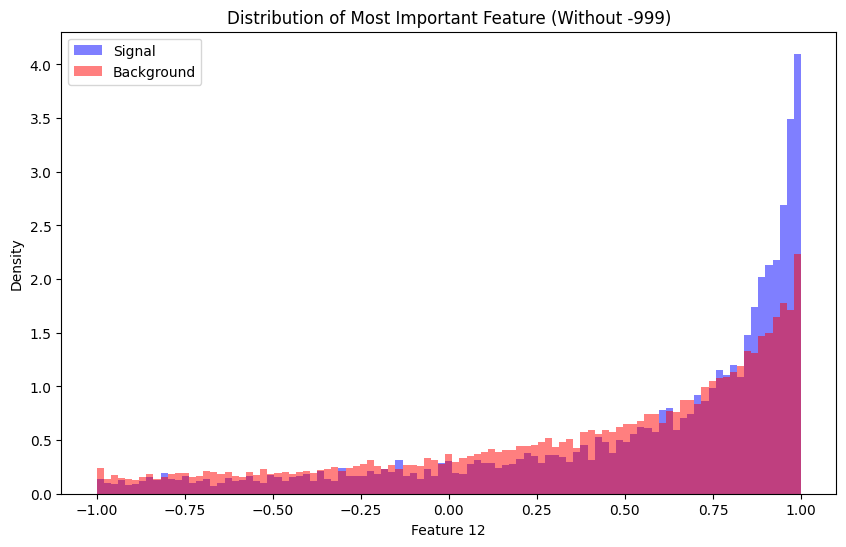

In [ ]:
top_feature_idx = 12

# Filter out -999 values
filtered_signal = X_test[(y_test == 1) & (X_test[:, top_feature_idx] != -999), top_feature_idx]
filtered_background = X_test[(y_test == 0) & (X_test[:, top_feature_idx] != -999), top_feature_idx]

# Determine binning based on the cleaned data
min_val, max_val = min(filtered_signal.min(), filtered_background.min()), max(filtered_signal.max(), filtered_background.max())
bins = np.linspace(min_val, max_val, 100)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_signal, bins=bins, alpha=0.5, label="Signal", color="blue", density=True)
plt.hist(filtered_background, bins=bins, alpha=0.5, label="Background", color="red", density=True)
plt.xlabel(f"Feature {top_feature_idx}")
plt.ylabel("Density")
plt.title("Distribution of Most Important Feature (Without -999)")
plt.legend()
plt.show()
